In [106]:
#Import libraries and load dataset and basic info
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('Housing_Price_Data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [107]:
#Check the summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [108]:
#Check for missing values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


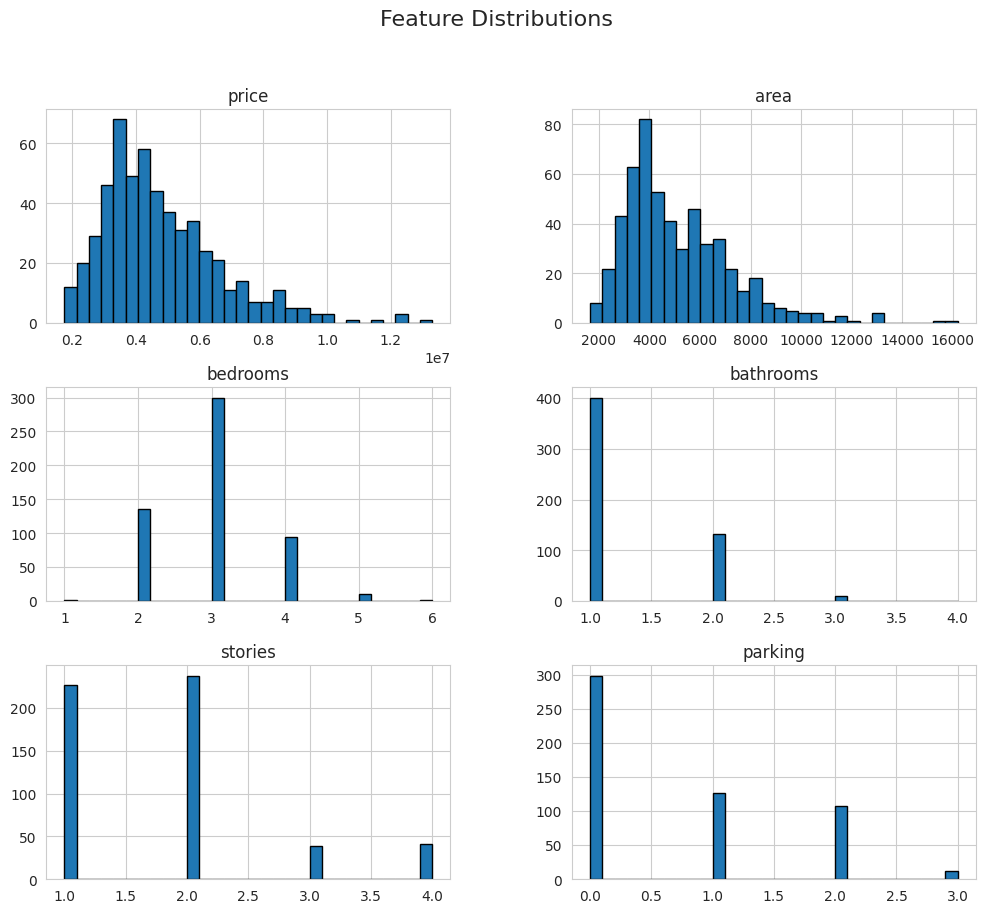

In [109]:
#Plot style and ploting the distributions of the numerical features
sns.set_style("whitegrid")

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

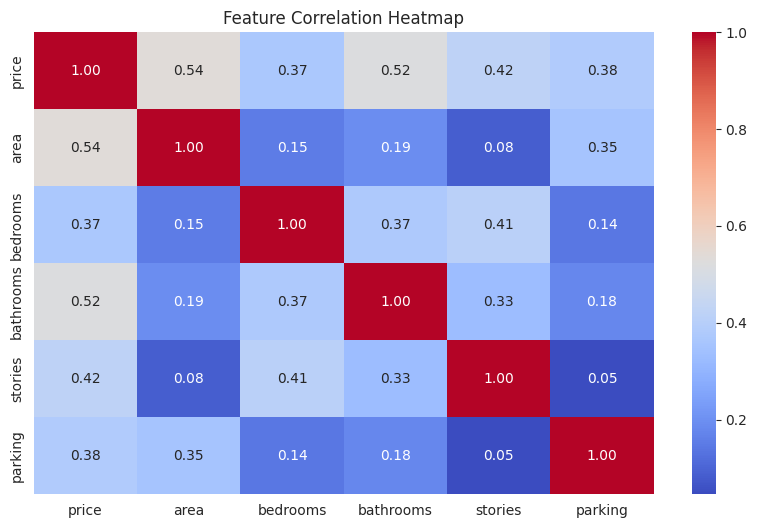

In [110]:
#Correlation Heatmap
object_cols = df.select_dtypes(include=['object']).columns
numerical_df = df.drop(columns=object_cols)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [111]:
#Fill missing values for numerical features only
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

#Fill missing values for categorical features with the mode
categorical_cols = df.select_dtypes(exclude=['number']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [112]:
#Convert categorical variables to numerical
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [113]:
#Apply Min-Max Scaling
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,False,False
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,False,False
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,True,False
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,False,False
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,False,False


In [114]:
#Feature Engineering
df['area_per_bedroom'] = df['area'] / df['bedrooms'].replace(0, 1)
df['bathrooms_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)
df['parking_per_story'] = df['parking'] / df['stories'].replace(0, 1)

correlations = df.corr()['price'].sort_values(ascending=False)
print(correlations)

if 'furnishingstatus_unfurnished' in df.columns:
    df.drop(columns=['furnishingstatus_unfurnished'], inplace=True)
if 'furnishingstatus_semi-furnished' in df.columns:
    df.drop(columns=['furnishingstatus_semi-furnished'], inplace=True)

df.fillna(0, inplace=True)

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
bathrooms_per_bedroom              0.442607
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
parking_per_story                  0.351129
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
area_per_bedroom                   0.210537
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


In [115]:
#Split the data into training and testing sets
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 14), (109, 14), (436,), (109,))

In [116]:
#Train the model
model = LinearRegression()

model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [4251962.28513952 -455281.88166176 5164473.9023117  1282850.40289651
  418093.51723711  242484.12464764  468654.62674617  713728.85532019
  819952.09147036  805391.35761341  616653.12276185 -313526.134734
 -820261.49183274  -26961.5927974 ]
Model Intercept: 2268977.5841137352


In [117]:
#Make predictions
y_pred = model.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head())


    Actual     Predicted
0  4060000  5.488722e+06
1  6650000  6.990786e+06
2  3710000  3.036946e+06
3  6440000  4.551035e+06
4  2800000  3.055571e+06


In [118]:
#Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 979829.90
Mean Squared Error (MSE): 1810344976381.39
Root Mean Squared Error (RMSE): 1345490.61
R² Score: 0.6418


In [119]:
#Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MAE: 1079567.31
Random Forest MSE: 2128341589159.68
Random Forest RMSE: 1458883.68
Random Forest R² Score: 0.5789
